In [1]:
# 📌 Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 📌 Cell 2: Load the Dataset
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Drop 'id' before training the model
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)


In [4]:
X = df.drop('stroke', axis=1)


In [5]:
# 📌 Cell 3: Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
# 📌 Cell 4: Basic Statistics
df.describe(include='all')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [7]:
# 📌 Cell 5: Check Missing Values
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

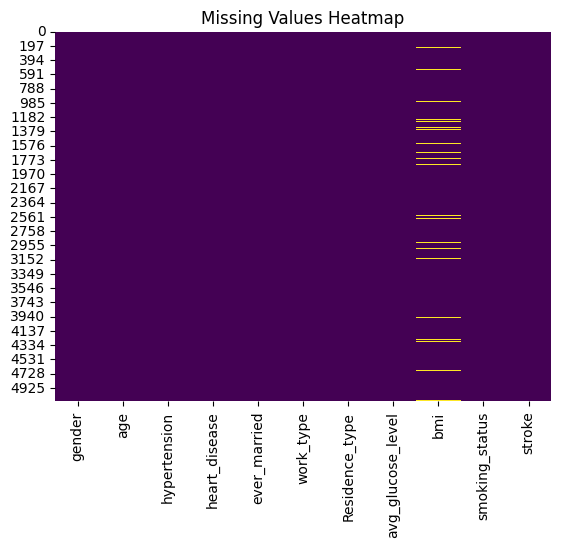

In [8]:
# 📌 Cell 6: Visualize Missing Values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


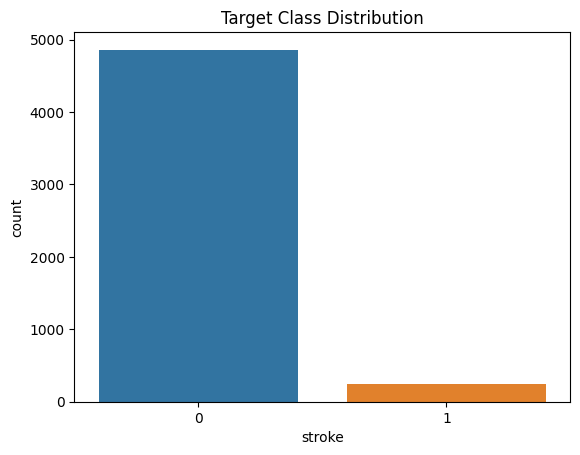

In [9]:
# 📌 Cell 7: Target Class Distribution
sns.countplot(x='stroke', data=df)
plt.title("Target Class Distribution")
plt.show()


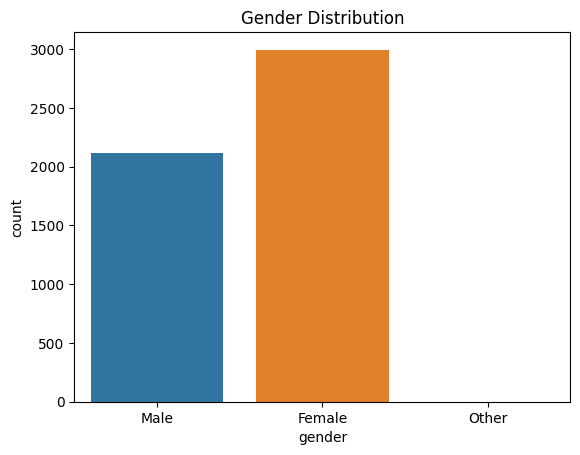

In [10]:
# 📌 Cell 8: Gender Distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


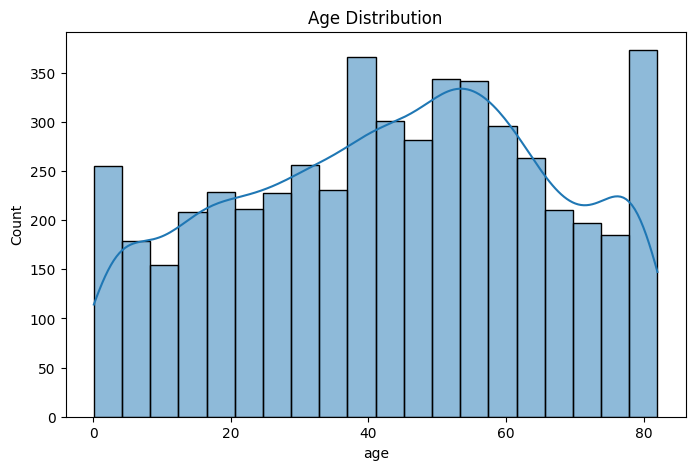

In [11]:
# 📌 Cell 9: Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


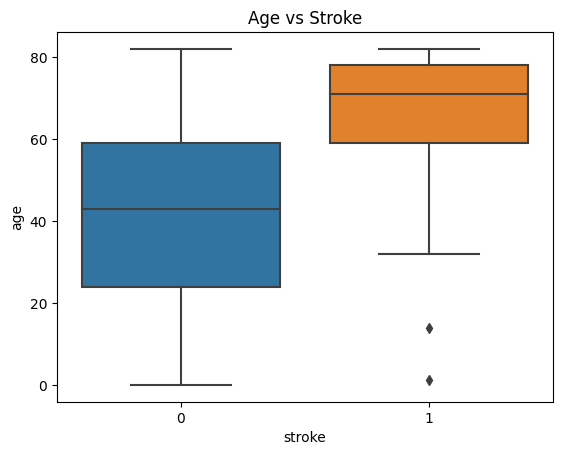

In [12]:
# 📌 Cell 10: Boxplot for Age vs Stroke
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age vs Stroke")
plt.show()


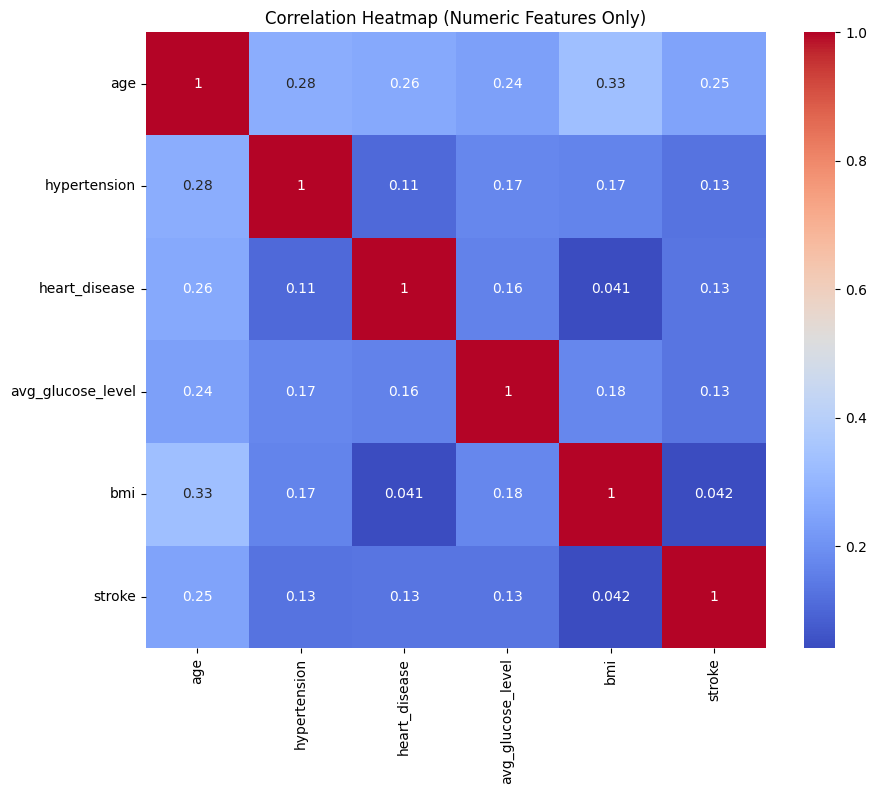

In [13]:
# 📌 Fixed Cell 11: Correlation Heatmap (Only Numeric Columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [14]:
# 📌 Cell 12: Unique Values Per Column
df.nunique()


gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

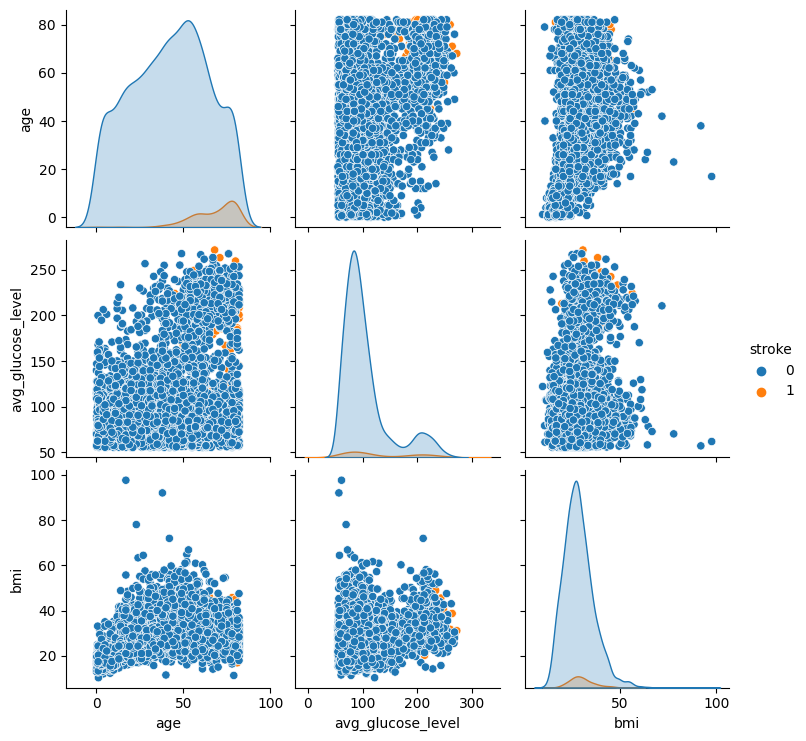

In [15]:
# 📌 Cell 13: Pairplot of Selected Features
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')


In [16]:
# 📌 Cell 14: Grouped Aggregation by Smoking Status
df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)


smoking_status
formerly smoked    0.079096
smokes             0.053232
never smoked       0.047569
Unknown            0.030440
Name: stroke, dtype: float64

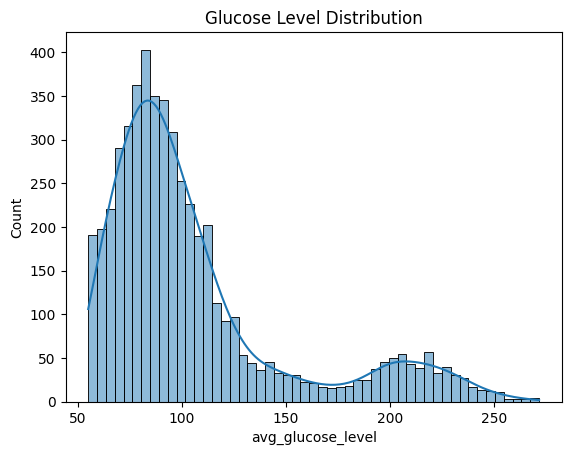

In [17]:
# 📌 Cell 15: Feature Distribution - avg_glucose_level
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title("Glucose Level Distribution")
plt.show()


In [18]:
# Fill missing values in 'bmi' with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [19]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [20]:
# Scale numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


In [21]:
# Define input features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [23]:
# Predict on test data
y_pred = model.predict(X_test)


In [24]:
# Evaluate with Accuracy Score, Classification Report, Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 0.7495107632093934

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



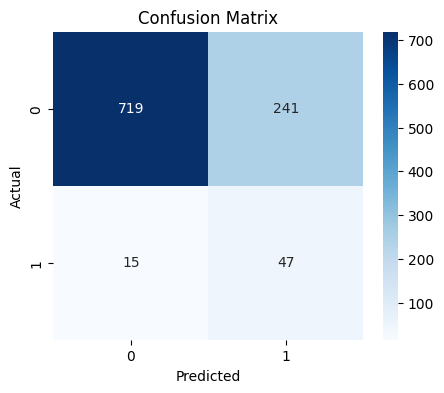

In [25]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Encode categorical features again to create the encoder dictionary
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Save model
joblib.dump(model, "stroke_model.pkl")

# Save scaler
joblib.dump(scaler, "stroke_scaler.pkl")

# Save encoders
joblib.dump(encoders, "stroke_encoder.pkl")


['stroke_encoder.pkl']

In [27]:
# Create fresh encoders using raw data
raw_df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(raw_df[col])   # ✅ FIT ON RAW STRINGS
    encoders[col] = le

# Save encoders
import joblib
joblib.dump(encoders, "stroke_encoder.pkl")


['stroke_encoder.pkl']

In [28]:
joblib.dump(model, "stroke_model.pkl")


['stroke_model.pkl']